Saved: allen_white_matter_sagittal.png


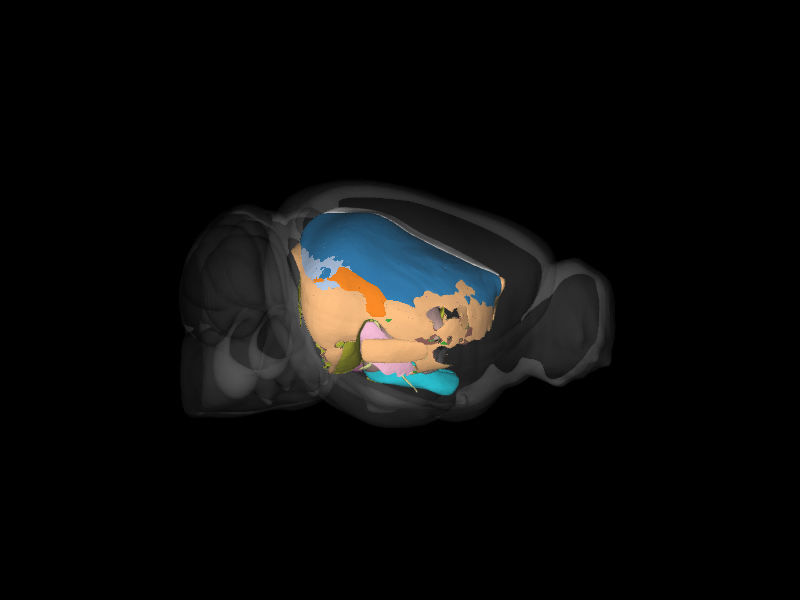

Saved: allen_white_matter_coronal.png


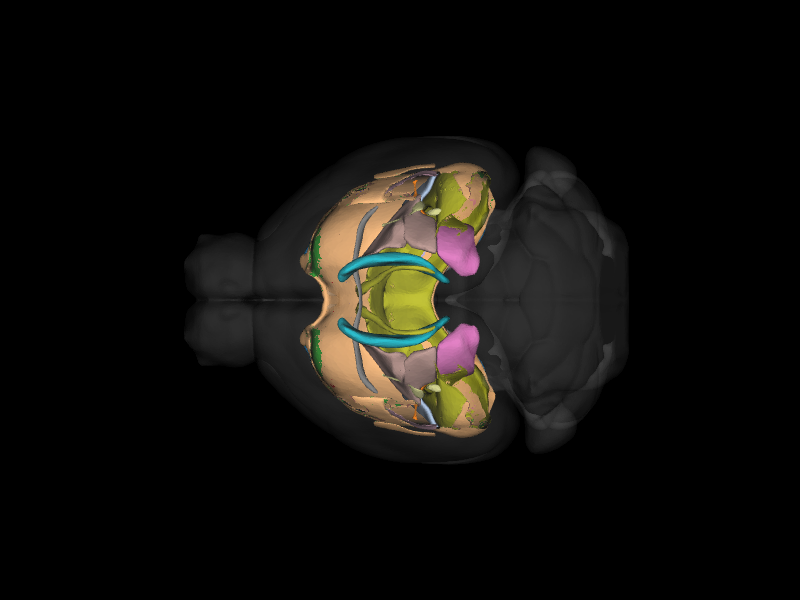

Saved: allen_white_matter_axial.png


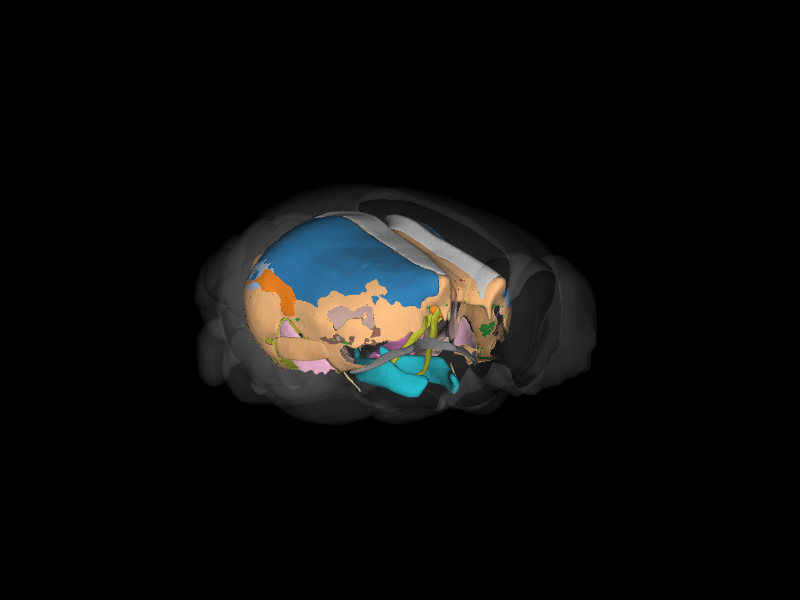

Saved: allen_white_matter_diagonal.png


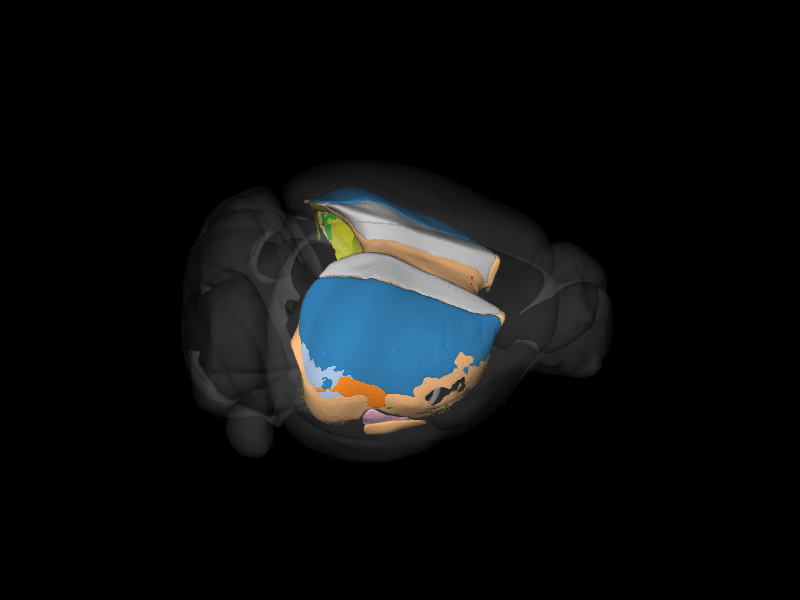

In [5]:
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
from vedo import Plotter, Mesh, LegendBox, Cone
import matplotlib.pyplot as plt
import numpy as np
import random
from IPython.display import Image, display

mcc = MouseConnectivityCache(resolution=10)
structure_tree = mcc.get_structure_tree()

fiber_tract_ids = [ 484682512, 484682520, 484682524, 776, 956, 964, 1108, 971, 484682516, 986, 579,
    6, 924, 884, 908, 940, 1099, 301, 54, 
]

# Generate distinct colors
random.seed(42)
cmap = plt.colormaps['tab20']
colors = [cmap(i / len(fiber_tract_ids))[:3] for i in range(len(fiber_tract_ids))]
tract_colors = dict(zip(fiber_tract_ids, colors))

# Load fiber tract meshes
tract_actors = []
legend_dummies = []

for sid in fiber_tract_ids:
    verts, norms, faces, _ = mcc.get_structure_mesh(sid)
    acronym = structure_tree.get_structures_by_id([sid])[0]['acronym']
    color = tract_colors[sid]

    # Actual brain mesh
    mesh = Mesh([verts, faces]).color(color).alpha(1.0)
    mesh.name = acronym
    tract_actors.append(mesh)
    
# Load transparent brain shell
brain_id = 997
verts, norms, faces, _ = mcc.get_structure_mesh(brain_id)
brain_shell = Mesh([verts, faces]).c('white').alpha(0.1)

# Define views
views = {
    "sagittal": dict(azimuth=0, elevation=0),
    "coronal": dict(azimuth=0, elevation=90),
    "axial": dict(azimuth=-45, elevation=0),
    "diagonal": dict(azimuth=0, elevation=-45),
}

# Render
for view_name, angles in views.items():
    plt = Plotter(bg='black', axes=0, title=f'{view_name.capitalize()} View')

    # Show brain and tracts
    plt.show(*tract_actors, brain_shell, zoom=1.3, interactive=False)
    plt.camera.Azimuth(angles["azimuth"])
    plt.camera.Elevation(angles["elevation"])
    plt.camera.SetViewUp(0, -1, 0)
    plt.reset_camera()


    # Save and show image
    img_path = f"allen_white_matter_{view_name}.png"
    plt.screenshot(img_path)
    print(f"Saved: {img_path}")
    plt.close()
    display(Image(filename=img_path))

Saved black background legend: fiber_tract_legend_black.png


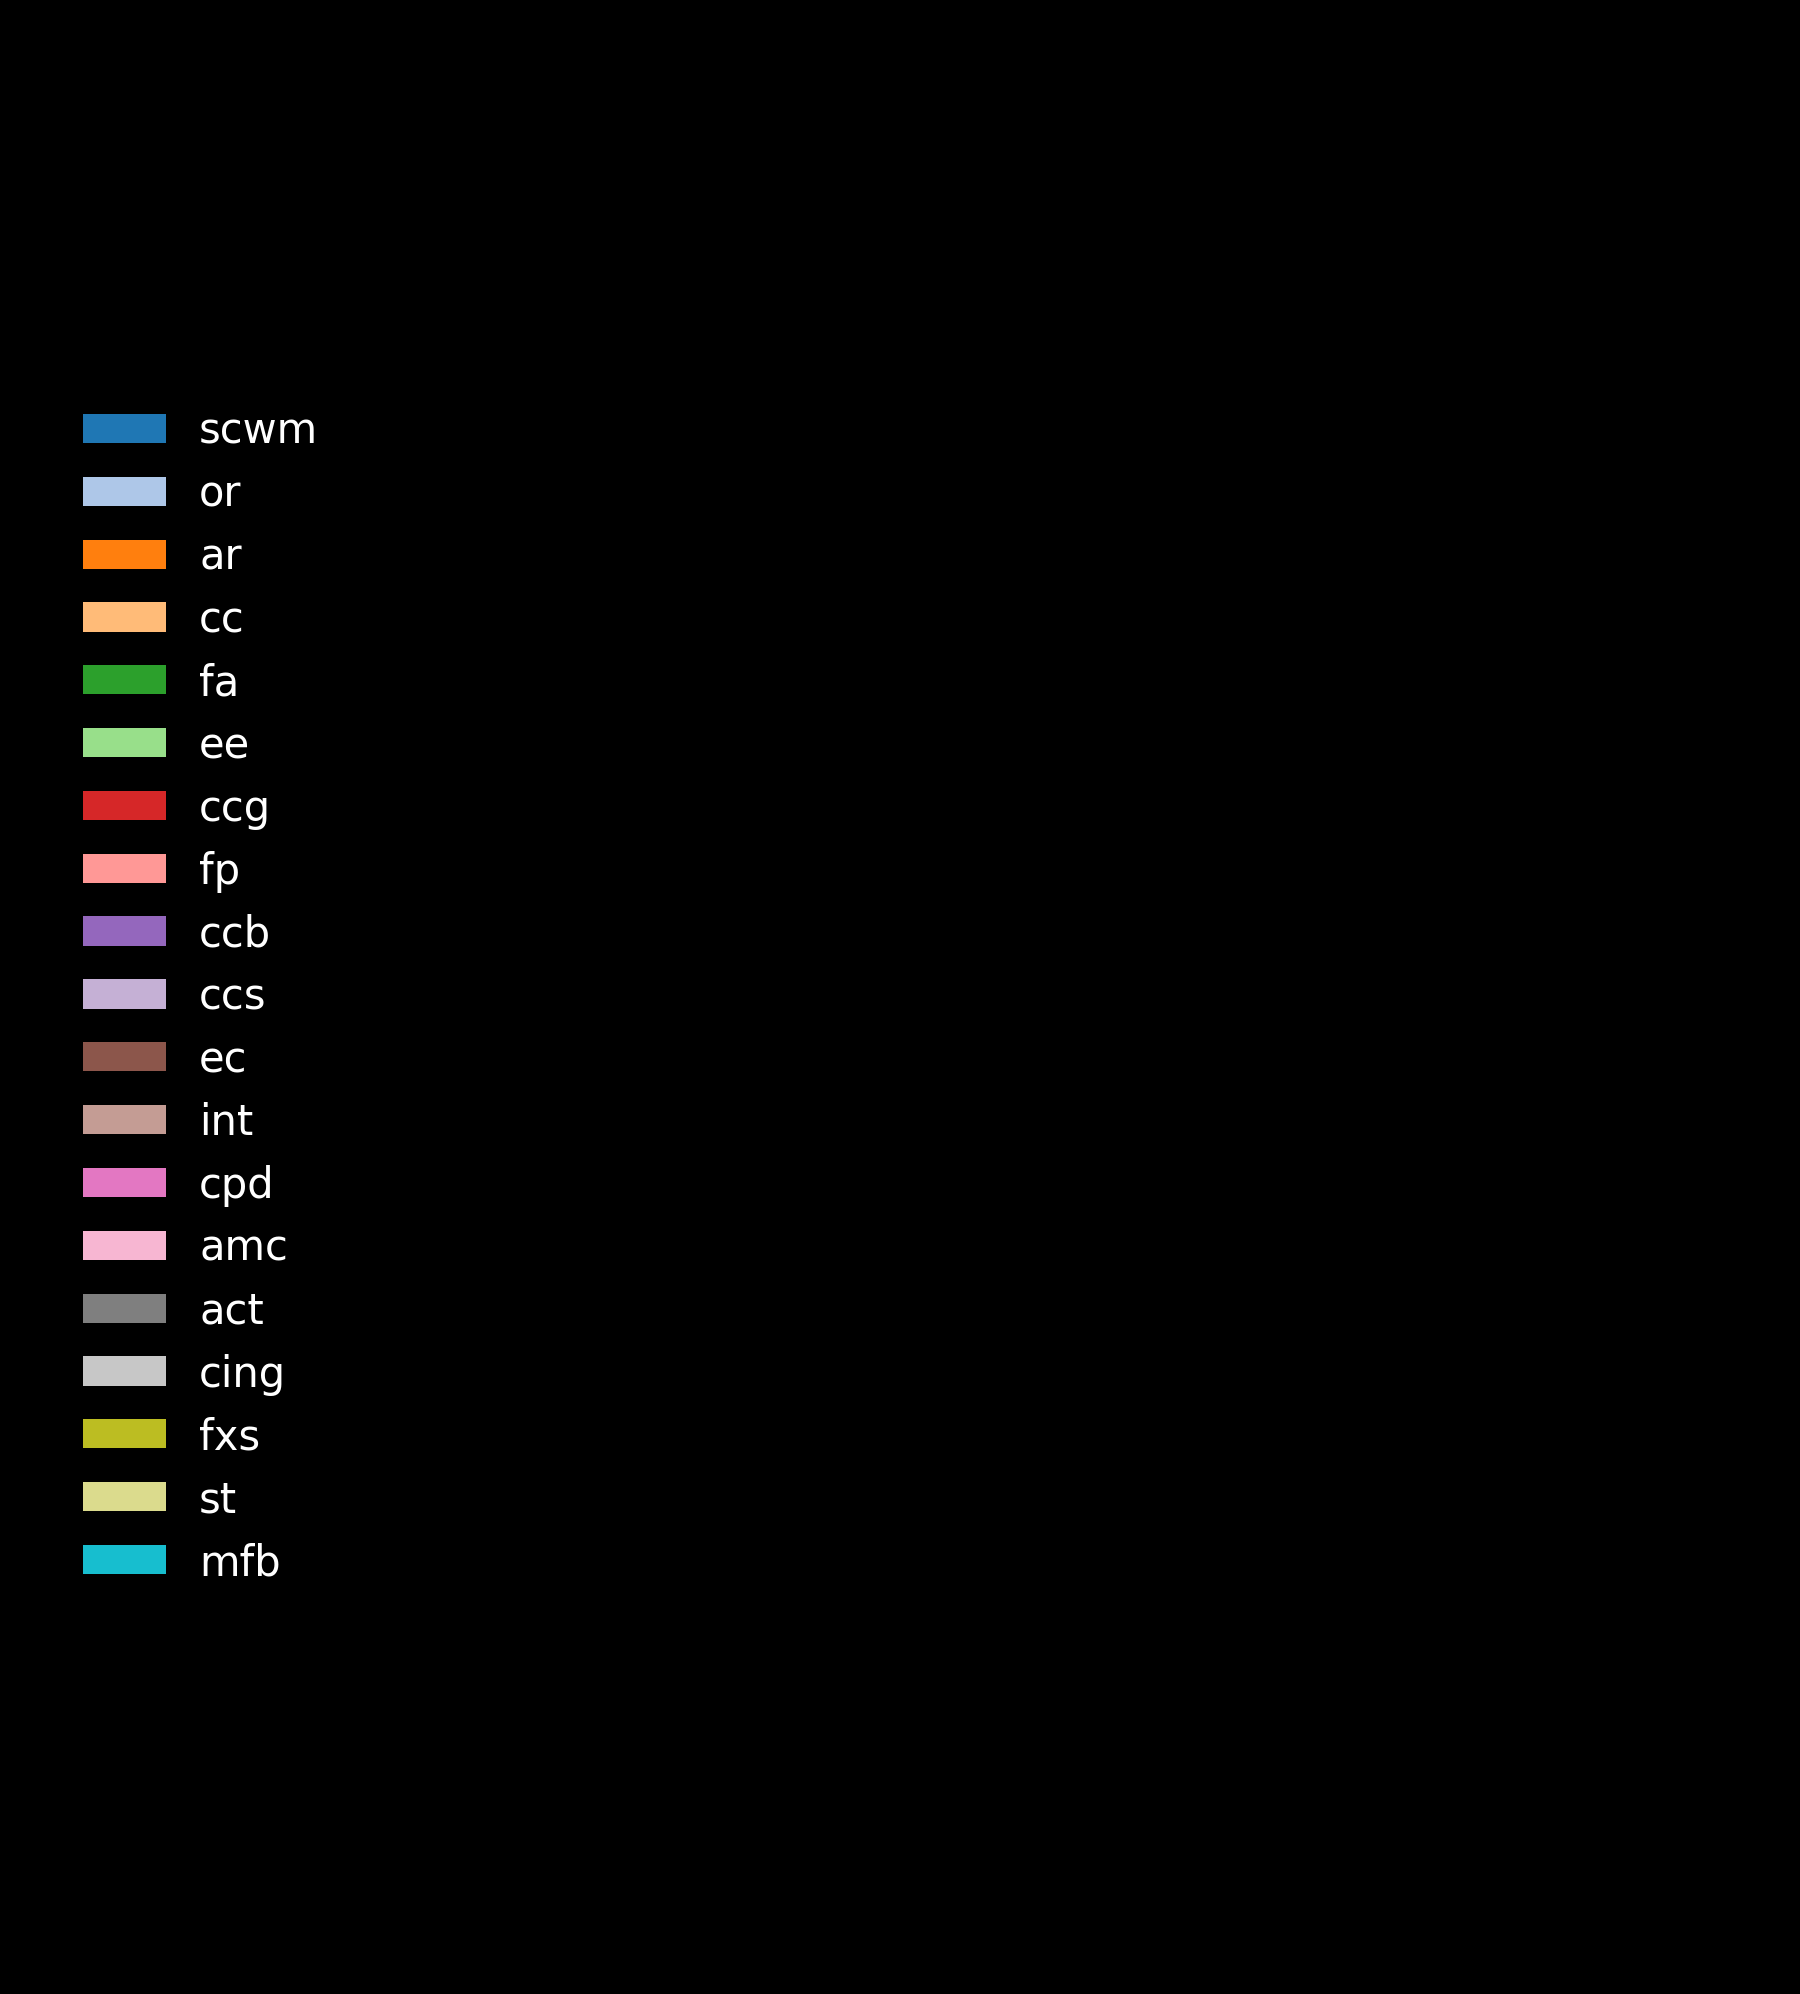

In [8]:
fig, ax = mpl.subplots(figsize=(6, len(fiber_tract_ids) * 0.35), facecolor='black')
ax.set_facecolor('black')
ax.axis('off')

handles, labels = [], []
for sid in fiber_tract_ids:
    color = tract_colors[sid]
    acronym = structure_tree.get_structures_by_id([sid])[0]['acronym']
    handles.append(mpl.Rectangle((0, 0), 1, 1, fc=color))
    labels.append(acronym)

leg = ax.legend(handles=handles, labels=labels,
                loc='center left', frameon=False, fontsize=10,
                labelcolor='white')
for t in leg.get_texts():
    t.set_color("white")

mpl.tight_layout()
legend_path = "fiber_tract_legend_black.png"
mpl.savefig(legend_path, dpi=300, facecolor='black')
mpl.close(fig)

print(f"Saved black background legend: {legend_path}")
display(Image(filename=legend_path))
